In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import joblib

In [2]:
# Sample data
# Read the CSV file
df_from_csv = pd.read_csv('updated dhummy data set.csv')

# Assign the data to the 'data' variable (optional)
data = df_from_csv

#df = pd.DataFrame(data)
print(data)

     Cluster  Response Time  ActivityLevel
0          2          13.12              1
1          2           1.88              1
2          2          17.23              1
3          2          10.36              1
4          2          18.20              1
..       ...            ...            ...
495        3          53.69              3
496        3          41.25              3
497        3          49.70              3
498        1          23.55              2
499        1          25.81              2

[500 rows x 3 columns]


In [3]:
# Split the data into input (X) and output (y)
X = data[['Cluster', 'Response Time']]
y = data['ActivityLevel']

print(X)
print(y)

     Cluster  Response Time
0          2          13.12
1          2           1.88
2          2          17.23
3          2          10.36
4          2          18.20
..       ...            ...
495        3          53.69
496        3          41.25
497        3          49.70
498        1          23.55
499        1          25.81

[500 rows x 2 columns]
0      1
1      1
2      1
3      1
4      1
      ..
495    3
496    3
497    3
498    2
499    2
Name: ActivityLevel, Length: 500, dtype: int64


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [5]:
# Predict
y_pred = model.predict(X_test)

# Check accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.99


In [6]:
!pip install seaborn


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
!pip install numpy


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


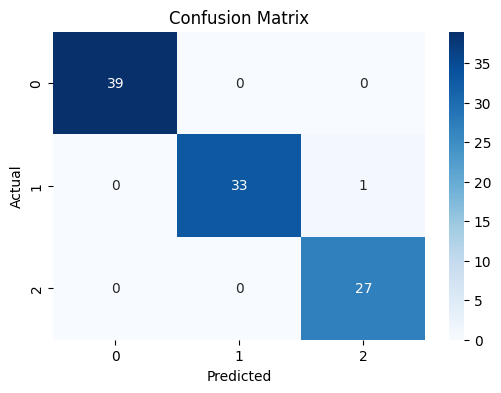

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display as a heatmap using Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

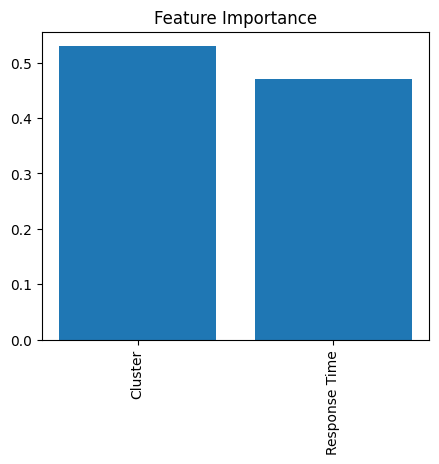

In [9]:
import numpy as np

# Extract feature importances from the model
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(5, 4))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.title("Feature Importance")
plt.show()

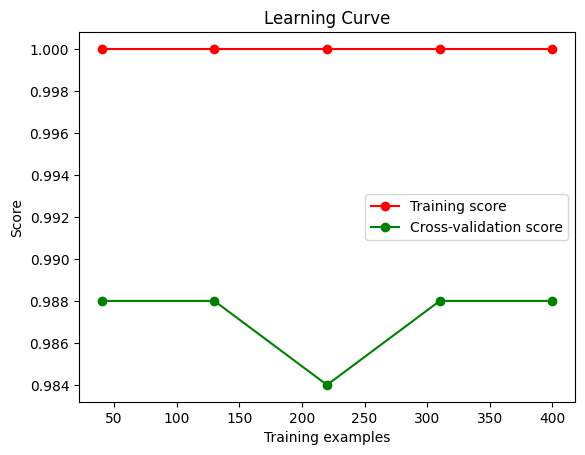

In [10]:
from sklearn.model_selection import learning_curve
import numpy as np

# Create a learning curve plot
train_sizes, train_scores, test_scores = learning_curve(model, X, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

In [11]:
import joblib
joblib.dump(model, 'activity_prediction_model.pkl')

['activity_prediction_model.pkl']

In [12]:
import joblib
import pandas as pd

def predict_Activity(cluster, response_time):
    loaded_model = joblib.load('activity_prediction_model.pkl')

    if cluster != 0: 
    # Use the loaded model to make predictions
        new_data = pd.DataFrame({'Cluster': [cluster], 'Response Time': [response_time]})
        predicted_activity = loaded_model.predict(new_data)
    
        if predicted_activity == 1:
            activity_string = "yesno"
        elif predicted_activity == 2:
            activity_string = "mcq"
        elif predicted_activity == 3:
            activity_string = "shortanswers"
        else:
            activity_string = "Unknown"
    
        print(f"Predicted Activity Level: {activity_string}")

        return activity_string
    else:
        print("Invalid cluster")

predict_Activity(1,21.5)

Predicted Activity Level: mcq


'mcq'

In [13]:
from flask import Flask, request, jsonify
import socket
app = Flask(__name__)

@app.route('/')
def index():
    return jsonify("Welcome to the home page")

@app.route('/predict_activity', methods=['GET'])
def predict_activity_route():

    Cluster = request.args.get('Cluster')
    Response_time = request.args.get('Response_time')

    Cluster = str(Cluster)
    Response_time = str(Response_time)

    if Cluster == "Good":
        cluster_no = 1
    elif Cluster == "Moderate":
        cluster_no = 2
    elif Cluster == "Worst":
        cluster_no = 3
    else:
        cluster_no = 0
     
    label = predict_Activity(cluster_no,Response_time)

#return jsonify(cluster_string)
    response = jsonify(label)
    response.headers.add("Access-Control-Allow-Origin", "http://localhost:3000")  # Adjust the origin as needed
    response.headers.add("Access-Control-Allow-Methods", "GET")
    return response

if __name__ == '__main__':
    app.run(host='localhost', port=5002)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://localhost:5002
Press CTRL+C to quit
127.0.0.1 - - [21/Dec/2023 13:54:38] "GET /predict_activity?Cluster=Modarate&Response_time=26 HTTP/1.1" 200 -


Invalid cluster
